In [1]:
%pip install tensorflow
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [33]:
def f(x):
    return (x + 1) ** 2 * (x - 1)


train_dataset = tf.data.Dataset.from_tensor_slices(tf.linspace(-8., 8., 100)).map(
    lambda x: (x, f(x))).batch(1)
test_dataset = tf.data.Dataset.from_tensor_slices(tf.linspace(-4., 4., 100)).map(
    lambda x: (x, f(x))).batch(1)

model = keras.models.Sequential([
    keras.layers.Input(shape=(1, )),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(train_dataset, epochs=3)
model.evaluate(test_dataset)

Epoch 1/3
100/100 [==============================] - 1s 2ms/step - loss: 38172.4492 - mae: 126.3940
Epoch 2/3
100/100 [==============================] - 0s 2ms/step - loss: 36992.2344 - mae: 123.4138
Epoch 3/3
100/100 [==============================] - 0s 2ms/step - loss: 297.9835 - mae: 10.8006


[297.98345947265625, 10.800586700439453]

4/4 [==============================] - 0s 2ms/step


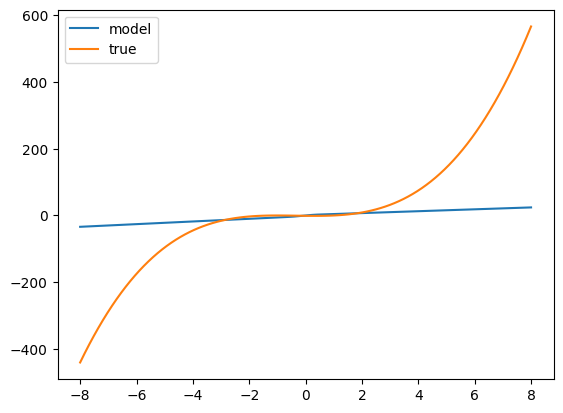

In [34]:
x = tf.linspace(-8., 8., 100)
y = model.predict(x).flatten()
z = f(x)

plt.plot(x, y, label='model')
plt.plot(x, z, label='true')
plt.legend()
plt.show()